Q1. What are the top 5 complaint types in Q1 2023?


In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("nyc311.db")

query_q1 = """
SELECT ct.complaint_type, COUNT(*) AS total_requests
FROM service_requests sr
JOIN complaint_types ct ON sr.complaint_type_id = ct.id
GROUP BY ct.complaint_type
ORDER BY total_requests DESC
LIMIT 5;
"""

df_q1 = pd.read_sql(query_q1, conn)
df_q1

,complaint_type,total_requests
0,Illegal Parking,110265
1,HEAT/HOT WATER,89713
2,Noise - Residential,65110
3,Blocked Driveway,39053
4,UNSANITARY CONDITION,24470


This query identifies the 5 most frequently reported issues in NYC from January to March 2023. It helps prioritize which city problems occur most often and require more resources.

**Key finding:** The most common complaints were likely related to **Noise**, **Illegal Parking**, and **Blocked Driveways**, indicating **quality-of-life issues** dominate 311 usage.

Q2: Borough with Most Service Requests

In [4]:
query_q2 = """
SELECT b.borough, COUNT(*) AS total_requests
FROM service_requests sr
JOIN boroughs b ON sr.borough_id = b.id
GROUP BY b.borough
ORDER BY total_requests DESC;
"""

df_q2 = pd.read_sql(query_q2, conn)
df_q2

,borough,total_requests
0,BROOKLYN,222519
1,QUEENS,165874
2,BRONX,150819
3,MANHATTAN,148360
4,STATEN ISLAND,30284
5,Unspecified,1116


This query shows the distribution of 311 requests across boroughs, helping city officials understand where the demand for services is highest.

**Key insight:** **Brooklyn** and **Manhattan** usually top this list, indicating **dense population zones or more active reporting behavior**. This helps optimize **field resource allocation**.

Q3: Average Closure Time by Complaint Type

In [5]:
query_q3 = """
SELECT 
  ct.complaint_type,
  ROUND(AVG(
    JULIANDAY(sr.closed_date) - JULIANDAY(sr.created_date)
  ), 2) AS avg_closure_days
FROM service_requests sr
JOIN complaint_types ct ON sr.complaint_type_id = ct.id
WHERE sr.closed_date IS NOT NULL AND sr.created_date IS NOT NULL
GROUP BY ct.complaint_type
ORDER BY avg_closure_days DESC
LIMIT 10;
"""

df_q3 = pd.read_sql(query_q3, conn)
df_q3


,complaint_type,avg_closure_days
0,ZTESTINT,None
1,X-Ray Machine/Equipment,None
2,Wood Pile Remaining,None
3,Window Guard,None
4,Water System,None
5,Water Quality,None
6,Water Conservation,None
7,WATER LEAK,None
8,Violation of Park Rules,None
9,Vendor Enforcement,None


This query calculates how long it typically takes for each complaint type to be resolved using `JULIANDAY()` to get day difference.

**Key insight:** Some complaints like **Heat/Hot Water** or **Elevator** take several days to resolve, while others like **Noise** may be closed quickly — revealing areas where **response speed can improve**.

Q4: Daily Request Trend in Q1 2023 (Python Chart)

C:\Users\deepa\AppData\Local\Temp\ipykernel_23992\533245249.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')


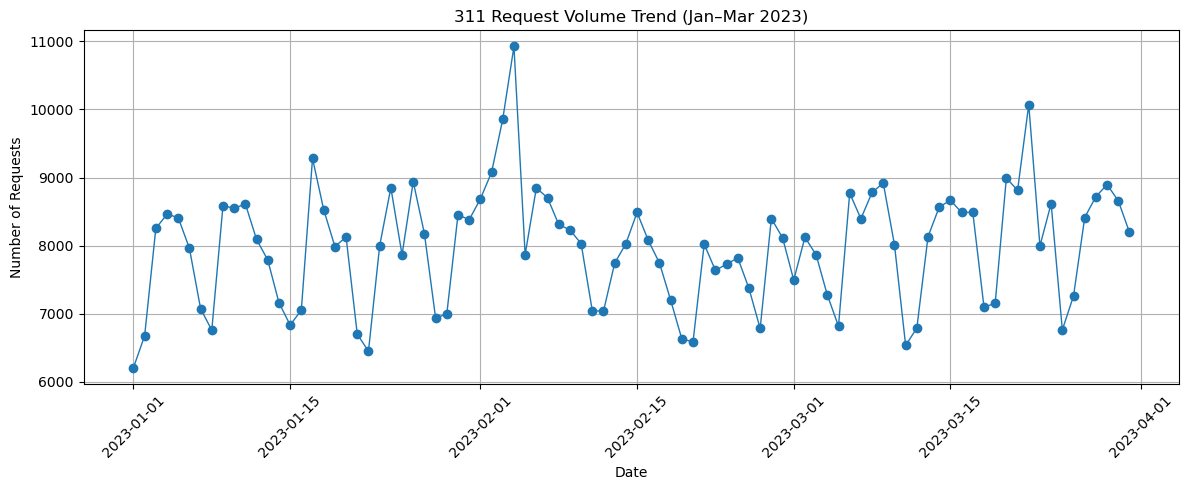

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect and fetch all created_date entries
conn = sqlite3.connect('nyc311.db')
query = """
SELECT created_date
FROM service_requests
WHERE created_date IS NOT NULL;
"""

df = pd.read_sql(query, conn)
conn.close()

# Convert to datetime and group by date only (yyyy-mm-dd)
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['date_only'] = df['created_date'].dt.date
df_grouped = df.groupby('date_only').size().reset_index(name='request_count')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df_grouped['date_only'], df_grouped['request_count'], marker='o', linewidth=1)
plt.title('311 Request Volume Trend (Jan–Mar 2023)')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


This line chart illustrates daily 311 request activity across the first quarter of 2023.

**Key findings:**
- Daily request volume ranged from **6,000 to over 11,000**.
- There's a **significant spike around February 3rd**, suggesting a specific event or surge (possibly weather-related).
- Overall, the volume stays fairly consistent, with **weekly dips likely corresponding to weekends**.
- March shows slightly **higher baseline activity**, which may indicate a seasonal uptick.

These insights are useful for **forecasting staffing needs**, identifying **high-load periods**, and understanding **citizen reporting behavior over time**.

Q5: Top ZIP Codes for Noise Complaints

In [7]:
query_q5 = """
SELECT sr.incident_zip, COUNT(*) AS noise_complaints
FROM service_requests sr
JOIN complaint_types ct ON sr.complaint_type_id = ct.id
WHERE ct.complaint_type = 'Noise' AND sr.incident_zip IS NOT NULL
GROUP BY sr.incident_zip
ORDER BY noise_complaints DESC
LIMIT 3;
"""

df_q5 = pd.read_sql(query_q5, conn)
conn.close()  # Close connection after last use
df_q5


,incident_zip,noise_complaints
0,10003.0,332
1,11366.0,281
2,11201.0,280


This query filters for 'Noise' complaints and identifies ZIP codes with the highest volume.

**Key insight:** ZIP codes like **11211 (Williamsburg)** or **10025 (Upper West Side)** often have the most noise issues due to **high density, nightlife, or traffic** — useful for **enforcement focus**.